In [178]:
# Import data processing & analysis packages.

## Data Processing.
import pandas as pd
import numpy as np
import os

## Data Visualisation.
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import plotly.express as px
from matplotlib_venn import venn2

## Machine Learning.

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report
from tqdm import tqdm
from itertools import cycle
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import feature_selection
import squarify
# import imblearn

## Warning indication.
import warnings
warnings.filterwarnings('always') 



In [179]:
# Import Datasets.

df = pd.read_csv("Train.csv")

# Display the first 5 rows of the train dataset.
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [180]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [181]:
print(df.dtypes)
print('===========')
print(df.info())

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6

Text(0.5, 1.0, 'Sorted')

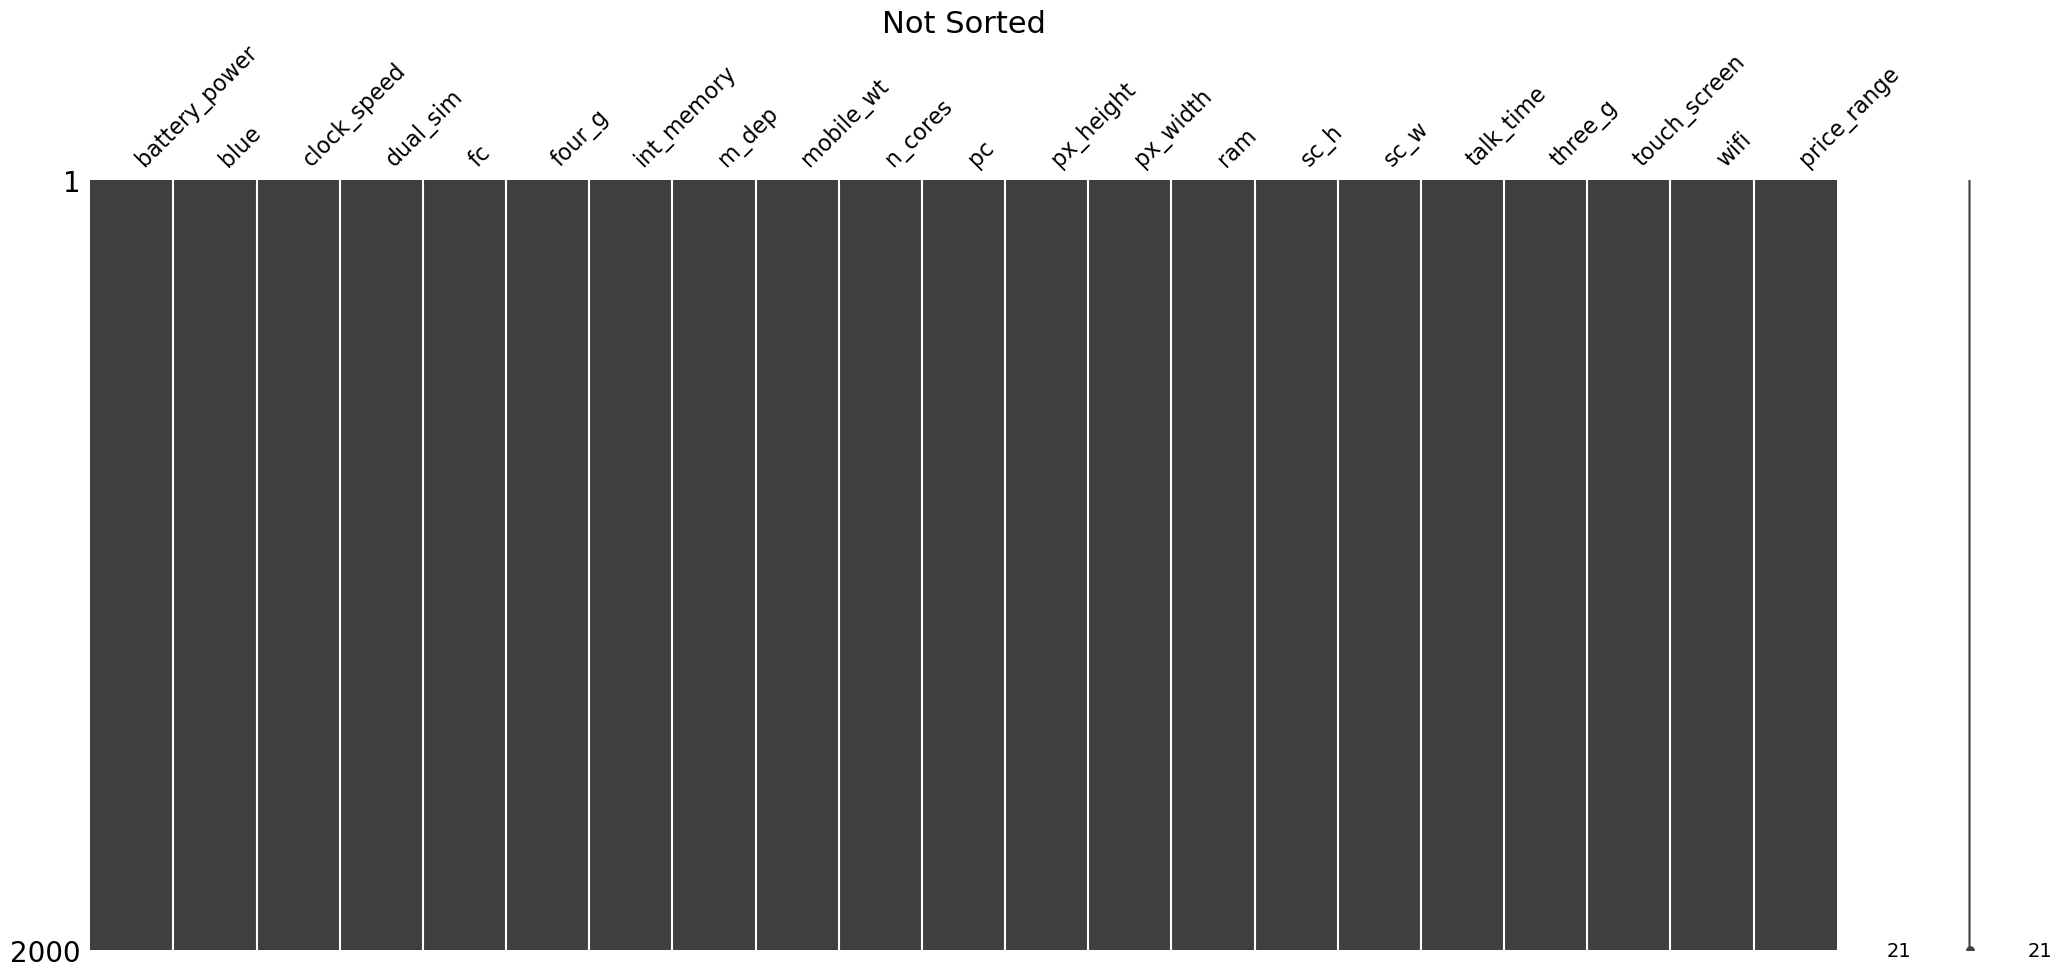

<Figure size 640x480 with 0 Axes>

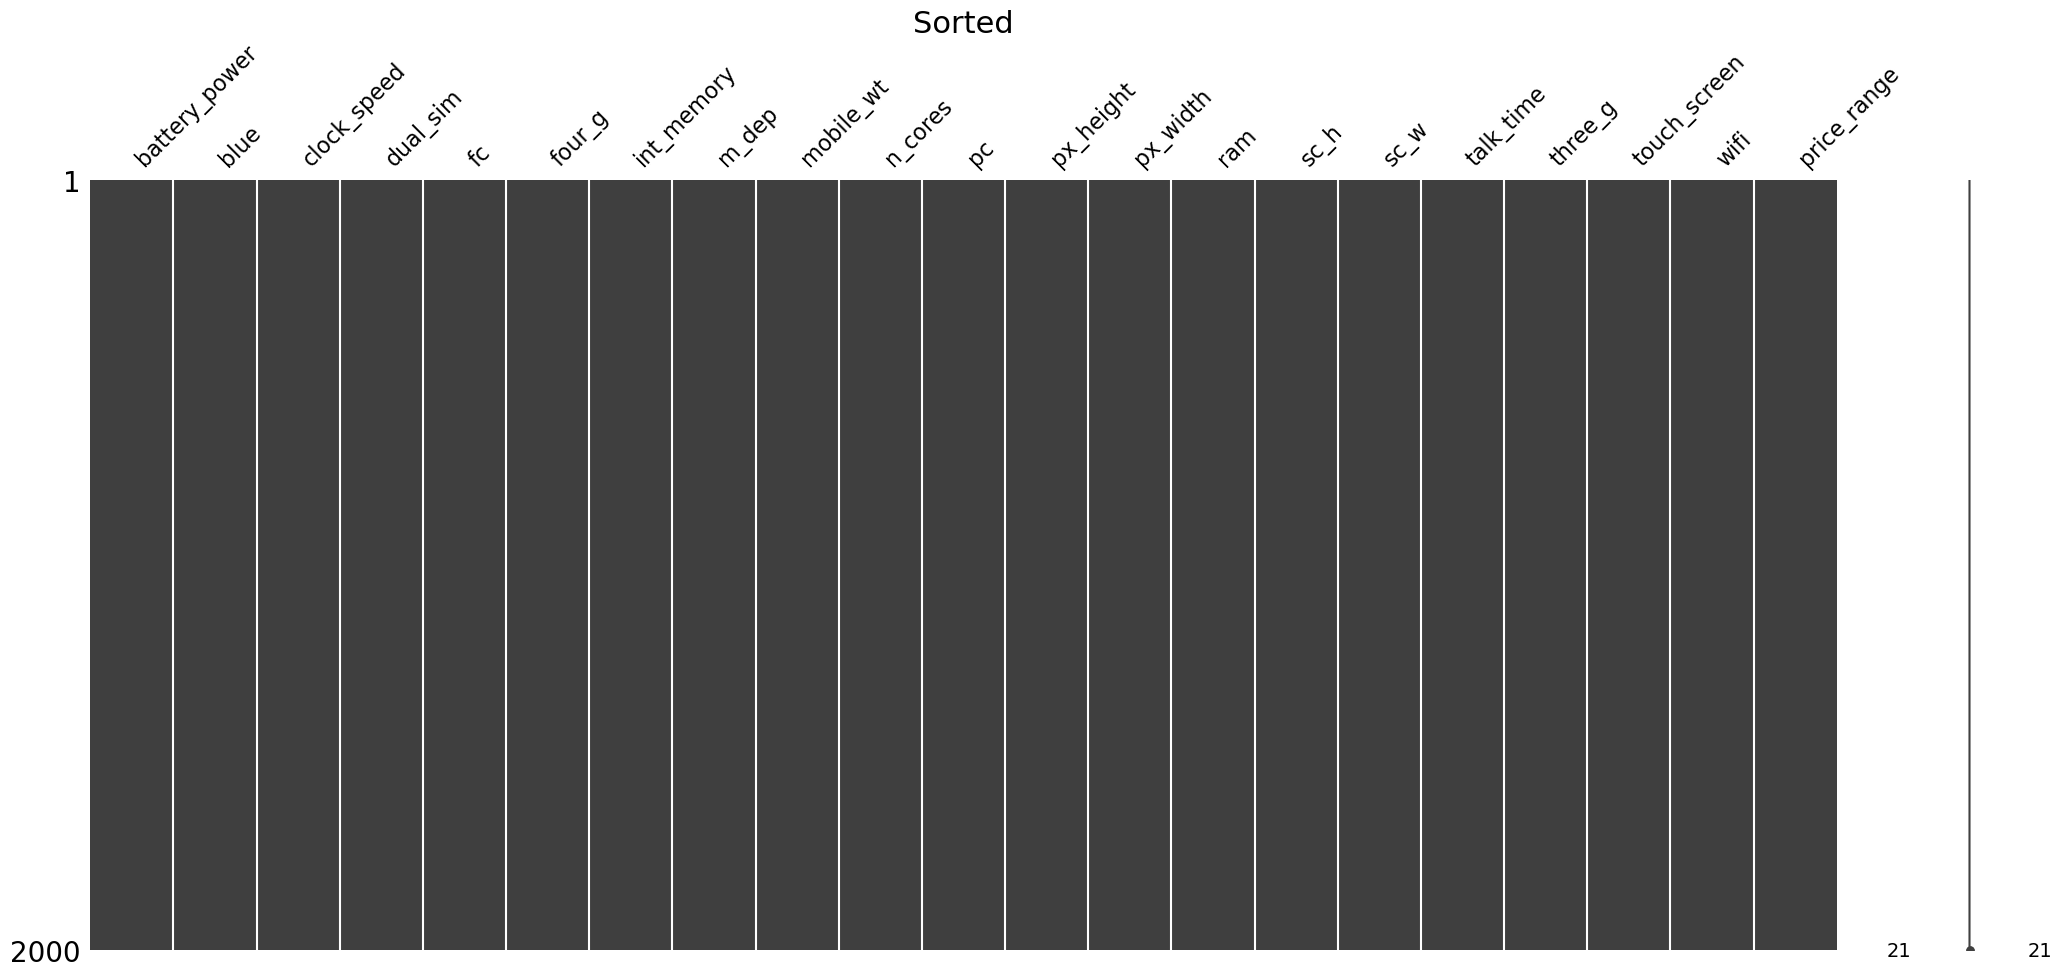

In [182]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

# plt.subplots(figsize=(20, 15))
# External package: conda install missingno 
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)

plt.figure()
mn.matrix(df.sort_values(by=["price_range","battery_power"]))
plt.title("Sorted",fontsize=22)
# plt.show()

In [183]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

['battery_power' 'blue' 'clock_speed' 'dual_sim' 'fc' 'four_g'
 'int_memory' 'm_dep' 'mobile_wt' 'n_cores' 'pc' 'px_height' 'px_width'
 'ram' 'sc_h' 'sc_w' 'talk_time' 'three_g' 'touch_screen' 'wifi'
 'price_range']


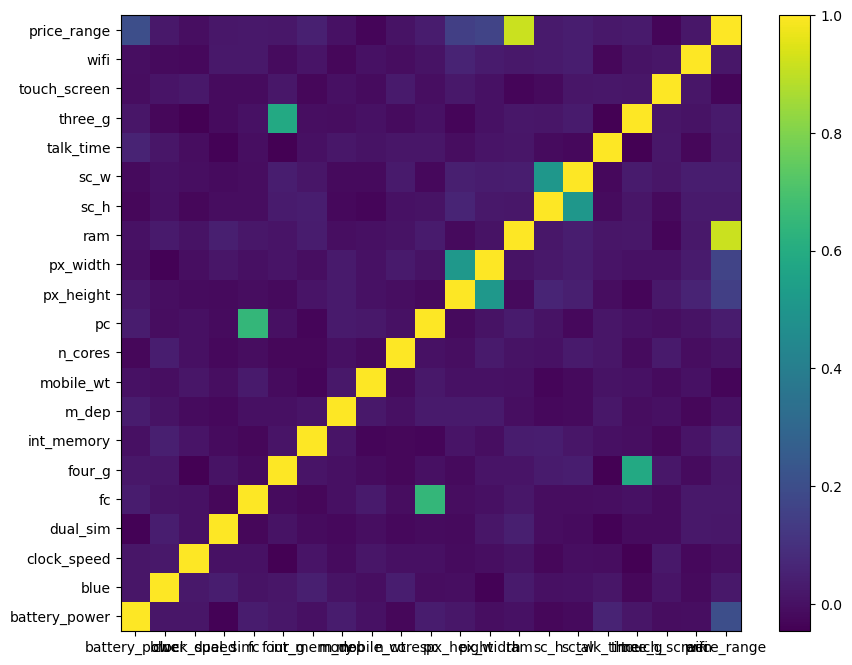

In [184]:
# Get the column names
column_names = df.columns

# Convert to numpy array
column_names_array = np.array(column_names)

print(column_names_array)
# plot the correlation matrix 
plt.subplots(figsize=(10, 8))
vars_to_use = column_names_array# pick vars
plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()
#This shows that the following are the most important for price_range (in this approximate order):
colsToUse = ['ram', 'px_width', 'px_height','battery_power','int_memory', 'pc']

In [185]:
# # lets remove the columns we don't want:
# columns_to_remove = ['blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'm_dep', 'mobile_wt', 'n_cores', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
# for col in columns_to_remove:
#     if col in df:
#         del df[col]

['battery_power' 'blue' 'clock_speed' 'dual_sim' 'fc' 'four_g'
 'int_memory' 'm_dep' 'mobile_wt' 'n_cores' 'pc' 'px_height' 'px_width'
 'ram' 'sc_h' 'sc_w' 'talk_time' 'three_g' 'touch_screen' 'wifi'
 'price_range']


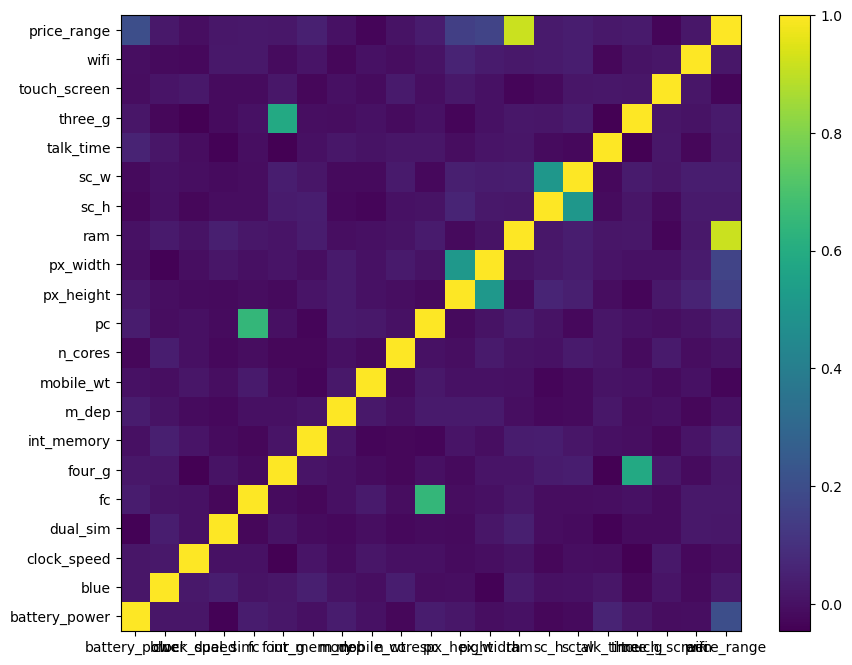

In [186]:
# Get the column names
column_names = df.columns

# Convert to numpy array
column_names_array = np.array(column_names)

print(column_names_array)
# plot the correlation matrix 
plt.subplots(figsize=(10, 8))
vars_to_use = column_names_array# pick vars
plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()
#This shows that the following are the most important for price_range (in this approximate order):
colsToUse = ['ram', 'px_width', 'px_height','battery_power','int_memory', 'pc']

In [187]:
# Let's start by programming the sigmoid and predictions.


import numpy as np
class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return 1/(1+np.exp(-theta)) 
    
    @staticmethod
    def _add_intercept(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self, X, add_intercept=True):
        # add bias term if requested
        Xb = self._add_intercept(X) if add_intercept else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
        
blr = BinaryLogisticRegressionBase(0.1)
print(blr)

Base Binary Logistic Regression Object, Not Trainable


In [188]:
# Now let's add the model training function, using the update equation defined previously:

# inherit from base class
class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_intercept=False))*xi 
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape) 
        
        return gradient/float(len(y))
       
    # public:
    def fit(self, X, y):
        Xb = self._add_intercept(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 

            
blr = BinaryLogisticRegression(0.1)
print(blr)

Untrained Binary Logistic Regression Object


In [189]:

# now lets do some vectorized coding
import numpy as np
from scipy.special import expit

class VectorBinaryLogisticRegression(BinaryLogisticRegression):
    # inherit from our previous class to get same functionality
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # but overwrite the gradient calculation
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_intercept=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        return gradient.reshape(self.w_.shape)


In [190]:
class LogisticRegression:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = (y==yval) # create a binary problem
            # train the binary classifier for this class
            blr = VectorBinaryLogisticRegression(self.eta,
                                                 self.iters)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row
    
lr = LogisticRegression(0.1,1500)
print(lr)

Untrained MultiClass Logistic Regression Object


In [209]:
# Assuming df is your DataFrame
# df = df[:2000]

# Then you can recreate your matrices
# matrixX = np.array([df["age"], df["working_week_per_year"], df["wage_per_hour"]])
# colsToUse = ['ram', 'px_width', 'px_height','battery_power']
colsToUse = np.array(column_names)
colsToUse = colsToUse[colsToUse != 'price_range']
X = np.array(df[colsToUse])  # No need to transpose
print(X.shape)

#need to clean dataset for:
#need to change this to multiclass thing, such as education or class,
matrixY = np.array([df['price_range']]) 

y =  np.ravel(matrixY)  # Use np.ravel() to flatten the array so that it is the right dimensions
print(y.shape)

# Training size of 80%, 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2)

lr = LogisticRegression(0.1,3000)
lr.fit(X_train,y_train)
# print(lr)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

(2000, 20)
(2000,)
Accuracy of:  0.4775


In [192]:

from sklearn.linear_model import LogisticRegression as SKLogisticRegression

lr_sk = SKLogisticRegression(solver='liblinear') # all params default

lr_sk.fit(X_train,y_train)
print(np.hstack((lr_sk.intercept_[:,np.newaxis],lr_sk.coef_)))
yhat = lr_sk.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

[[ 7.75325119e+00 -3.42163408e-03  3.52269918e-01  4.64841294e-01
   3.03246849e-01 -3.63072718e-02  2.53001454e-01  8.79727298e-03
   5.28052409e-01  1.60440184e-02  2.07604139e-01  3.67545560e-02
  -2.42749563e-03 -1.49694561e-03 -6.90668053e-03  1.43197959e-01
  -6.88881950e-03  3.89210122e-02  3.45496062e-01  3.69632525e-01
   6.28875912e-01]
 [-5.56583598e-03 -5.59235132e-05 -2.70792462e-02 -5.08518505e-02
   2.01430495e-02  1.17226165e-02 -1.24870834e-02 -1.10062334e-04
   3.89924538e-02  7.99086991e-04 -5.01154349e-02  5.01890725e-03
   2.08317730e-04 -9.36717309e-05 -5.36895562e-04 -3.78885192e-03
  -1.52926707e-02  1.64992016e-02 -1.08002797e-02  3.83149277e-02
   7.15059743e-03]
 [-2.24747322e-01 -1.70996493e-04 -7.73026833e-02 -3.65107754e-02
  -1.58700157e-01  1.40711530e-02 -1.44847279e-01 -1.00562469e-02
  -1.75895348e-01 -4.32221591e-04  2.69864017e-02 -1.47314694e-02
  -8.54749674e-05 -3.36288031e-04  5.50121589e-04 -4.00353613e-02
   5.92619698e-03 -1.03890527e-02 -2.8

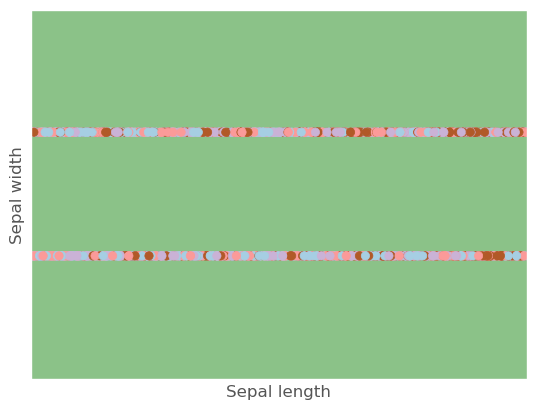

In [210]:
# # linear boundaries visualization from sklearn documentation
# from matplotlib import pyplot as plt
# import copy
# %matplotlib inline
# plt.style.use('ggplot')

# def plot_decision_boundaries(lr,Xin,y,title=''):
#     Xb = copy.deepcopy(Xin)
#     lr.fit(Xb[:,:2],y) # train only on two features

#     h=0.01
#     # create a mesh to plot in
#     x_min, x_max = Xb[:, 0].min() - 1, Xb[:, 0].max() + 1
#     y_min, y_max = Xb[:, 1].min() - 1, Xb[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))

#     # get prediction values
#     Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

#     # Plot also the training points
#     plt.scatter(Xb[:, 0], Xb[:, 1], c=y, cmap=plt.cm.Paired)
#     plt.xlabel('Sepal length')
#     plt.ylabel('Sepal width')
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.xticks(())
#     plt.yticks(())
#     plt.title(title)
#     plt.show()
    
# lr = LogisticRegression(0.1,1500) # this is still OUR LR implementation, not sklearn
# plot_decision_boundaries(lr,X,y)

In [ ]:
class RegularizedBinaryLogisticRegression(VectorBinaryLogisticRegression):
    # extend init functions
    def __init__(self, C=0.0, **kwds):        
        # need to add to the original initializer 
        self.C = C
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer
        
        
    # extend previous class to change functionality
    def _get_gradient(self,X,y):
        # call get gradient from previous class
        gradient = super()._get_gradient(X,y)
        
        # add in regularization (to all except bias term)
        gradient[1:] += -2 * self.w_[1:] * self.C
        return gradient
        

In [ ]:
# now redefine the Logistic Regression Function where needed
class RegularizedLogisticRegression(LogisticRegression):
    def __init__(self, C=0.0, **kwds):        
        # need to add to the original initializer 
        self.C = C
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            # now this has regularization built into it
            blr = RegularizedBinaryLogisticRegression(eta=self.eta,
                                                      iterations=self.iters,
                                                      C=self.C)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T

In [ ]:
from ipywidgets import widgets as wd

# create a possible value of C from 0.001 to 0.1
cost_vals = np.logspace(-3,1,15)
def lr_explor(cost_idx):
    C = cost_vals[cost_idx]
    lr_clf = RegularizedLogisticRegression(eta=0.1,
                                           iterations=2500, # lots of iterations (to help overfit)
                                           C=C) # get object
    
    plot_decision_boundaries(lr_clf,X,y,title="C=%.5f"%(C))
    plt.show()

wd.interact(lr_explor,cost_idx=(0,14,1),__manual=True)

# what happens when C gets too large??
# let's explore the different values and see what happens